# **Hypothesis Testing**

Joseph Lardie

September 2023

# **Imports**

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
import plotly

# Scipy
from scipy import stats
from scipy.stats import norm, pearsonr
import statsmodels.api as sm

# Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading in datasets**

In [2]:
# Loading NYC Restaraunt Inspection Data
rdf = pd.read_csv('rdf')

In [3]:
# Loading NYC Restaraunt Yelp Review Data
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209789 entries, 0 to 209788
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  209789 non-null  int64  
 1   DBA                    209165 non-null  object 
 2   BORO                   209789 non-null  object 
 3   BUILDING               209481 non-null  object 
 4   STREET                 209783 non-null  object 
 5   ZIPCODE                207093 non-null  float64
 6   CUISINE DESCRIPTION    207365 non-null  object 
 7   INSPECTION DATE        209789 non-null  object 
 8   ACTION                 207365 non-null  object 
 9   VIOLATION CODE         206208 non-null  object 
 10  VIOLATION DESCRIPTION  206208 non-null  object 
 11  CRITICAL FLAG          209789 non-null  object 
 12  SCORE                  199793 non-null  float64
 13  GRADE                  102961 non-null  object 
 14  GRADE DATE             94208 non-nul

In [5]:
# Yelp data
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         847 non-null    object 
 1   name          847 non-null    object 
 2   image_url     847 non-null    object 
 3   url           847 non-null    object 
 4   review_count  847 non-null    int64  
 5   categories    847 non-null    object 
 6   rating        847 non-null    float64
 7   coordinates   847 non-null    object 
 8   transactions  847 non-null    object 
 9   location      847 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


## **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rdf[rdf['BORO'].str.lower() == 'brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower() == 'pizza')]

In [8]:
# Filtering out rows with NaN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Taking a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                     DBA      BORO BUILDING  \
181     40616509               MONTY Q'S  Brooklyn      158   
211     41675367            J-M PIZZA II  Brooklyn     1323   
578     41296556        ENOTECA ON COURT  Brooklyn      347   
668     50047483          LOVE AND DOUGH  Brooklyn       68   
1002    50073372  PINO'S PIZZA AND GRILL  Brooklyn     2025   
...          ...                     ...       ...      ...   
208269  40396492      ROYAL KING'S PIZZA  Brooklyn     5211   
208503  41674167            FRANKS PIZZA  Brooklyn     8025   
209492  50033400        PALACE ON FULTON  Brooklyn     1882   
209504  50140484           MUNDO'S PIZZA  Brooklyn       25   
209771  50041320  A & L PIZZA RESTAURANT  Brooklyn     6024   

                   STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
181       MONTAGUE STREET  11201.0               Pizza      07/19/2022   
211              AVENUE U  11229.0               Pizza      01/06/2022   
578          COURT ST

## **Merging Yelp data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the restaurants 
merged_df = pd.merge(pizza_brooklyn_subset, ydf, left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows
merged_df.drop_duplicates(inplace=True)

# Displaying the merged dataframe
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
        CAMIS                          DBA      BORO BUILDING  \
0    40616509                    MONTY Q'S  Brooklyn      158   
1    40616509                    MONTY Q'S  Brooklyn      158   
2    40616509                    MONTY Q'S  Brooklyn      158   
3    40616509                    MONTY Q'S  Brooklyn      158   
4    40616509                    MONTY Q'S  Brooklyn      158   
..        ...                          ...       ...      ...   
510  40745618                 MIKE'S PIZZA  Brooklyn      905   
512  40745618                 MIKE'S PIZZA  Brooklyn      905   
513  50088788  L'ARTE DELLA PIZZA BROOKLYN  Brooklyn      172   
514  50088788  L'ARTE DELLA PIZZA BROOKLYN  Brooklyn      172   
515  50000967                      WHEATED  Brooklyn      905   

              STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0    MONTAGUE STREET  11201.0               Pizza      07/19/2022   
1    MONTAGUE STREET  11201.0               Pizza      07/19/2

In [12]:
merged_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,name,image_url,url,review_count,categories,rating,coordinates,transactions,location,_merge
0,40616509,MONTY Q'S,Brooklyn,158,MONTAGUE STREET,11201.0,Pizza,07/19/2022,Violations were cited in the following area(s).,04M,...,MONTY Q'S,https://s3-media2.fl.yelpcdn.com/bphoto/Bse0Uf...,https://www.yelp.com/biz/monty-qs-brooklyn-2?a...,250,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.0,"{'latitude': 40.6942, 'longitude': -73.99299}","['delivery', 'pickup']","{'address1': '158 Montague St', 'address2': ''...",both
1,40616509,MONTY Q'S,Brooklyn,158,MONTAGUE STREET,11201.0,Pizza,07/19/2022,Violations were cited in the following area(s).,08A,...,MONTY Q'S,https://s3-media2.fl.yelpcdn.com/bphoto/Bse0Uf...,https://www.yelp.com/biz/monty-qs-brooklyn-2?a...,250,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.0,"{'latitude': 40.6942, 'longitude': -73.99299}","['delivery', 'pickup']","{'address1': '158 Montague St', 'address2': ''...",both
2,40616509,MONTY Q'S,Brooklyn,158,MONTAGUE STREET,11201.0,Pizza,10/30/2023,Violations were cited in the following area(s).,10F,...,MONTY Q'S,https://s3-media2.fl.yelpcdn.com/bphoto/Bse0Uf...,https://www.yelp.com/biz/monty-qs-brooklyn-2?a...,250,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.0,"{'latitude': 40.6942, 'longitude': -73.99299}","['delivery', 'pickup']","{'address1': '158 Montague St', 'address2': ''...",both
3,40616509,MONTY Q'S,Brooklyn,158,MONTAGUE STREET,11201.0,Pizza,10/30/2023,Violations were cited in the following area(s).,08A,...,MONTY Q'S,https://s3-media2.fl.yelpcdn.com/bphoto/Bse0Uf...,https://www.yelp.com/biz/monty-qs-brooklyn-2?a...,250,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.0,"{'latitude': 40.6942, 'longitude': -73.99299}","['delivery', 'pickup']","{'address1': '158 Montague St', 'address2': ''...",both
4,40616509,MONTY Q'S,Brooklyn,158,MONTAGUE STREET,11201.0,Pizza,07/26/2021,Violations were cited in the following area(s).,02B,...,MONTY Q'S,https://s3-media2.fl.yelpcdn.com/bphoto/Bse0Uf...,https://www.yelp.com/biz/monty-qs-brooklyn-2?a...,250,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.0,"{'latitude': 40.6942, 'longitude': -73.99299}","['delivery', 'pickup']","{'address1': '158 Montague St', 'address2': ''...",both


In [13]:
# Looking at the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 515
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  502 non-null    int64   
 1   DBA                    502 non-null    object  
 2   BORO                   502 non-null    object  
 3   BUILDING               502 non-null    object  
 4   STREET                 502 non-null    object  
 5   ZIPCODE                498 non-null    float64 
 6   CUISINE DESCRIPTION    502 non-null    object  
 7   INSPECTION DATE        502 non-null    object  
 8   ACTION                 502 non-null    object  
 9   VIOLATION CODE         500 non-null    object  
 10  VIOLATION DESCRIPTION  500 non-null    object  
 11  CRITICAL FLAG          502 non-null    object  
 12  SCORE                  502 non-null    float64 
 13  GRADE                  502 non-null    object  
 14  GRADE DATE             495 non-null    obj

In [14]:
# Use boolean indexing to filter rows where the 'name_column' matches the target name
specific_restaurant = merged_df[merged_df['name'] == 'FRONT STREET PIZZA']

# Print or further process the specific restaurant data
print(specific_restaurant)

        CAMIS                 DBA      BORO BUILDING        STREET  ZIPCODE  \
441  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
442  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
443  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
444  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   

    CUISINE DESCRIPTION INSPECTION DATE  \
441               Pizza      03/20/2023   
442               Pizza      03/20/2023   
443               Pizza      03/20/2023   
444               Pizza      03/20/2023   

                                              ACTION VIOLATION CODE  ...  \
441  Violations were cited in the following area(s).            02H  ...   
442  Violations were cited in the following area(s).            09C  ...   
443  Violations were cited in the following area(s).            10F  ...   
444  Violations were cited in the following area(s).            02B  ...   

       

# **Data Cleaning**

In [15]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
merged_df['unique_id'] = merged_df['name'] + '_' + merged_df['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
merged_df = merged_df.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [16]:
# Dropping irrelevant columns
merged_df.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [17]:
# checking missing data in data 
def check_missing_data(rdf):
    total = merged_df.isnull().sum().sort_values(ascending = False)
    percent = (merged_df.isnull().sum()/merged_df.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(merged_df)
missing_data_result.head()

,Total,Percent
GRADE DATE,2,2.47%
CAMIS,0,0.0%
location,0,0.0%
transactions,0,0.0%
rating,0,0.0%


In [18]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(merged_df):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = merged_df.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

merged_df = eliminate_missing_grade_date_rows(merged_df)

In [19]:
merged_df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection              35
Cycle Inspection / Re-inspection                   25
Pre-permit (Operational) / Initial Inspection      12
Pre-permit (Operational) / Re-inspection            3
Cycle Inspection / Reopening Inspection             3
Pre-permit (Operational) / Reopening Inspection     1
Name: INSPECTION TYPE, dtype: int64

In [20]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(merged_df):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = merged_df.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

merged_df = filter_inspection_type(merged_df)

In [21]:
#create a dataframe with the most recent inspection data
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [22]:
# Viewing the cleaaned dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 171 to 318
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  60 non-null     int64  
 1   DBA                    60 non-null     object 
 2   BORO                   60 non-null     object 
 3   STREET                 60 non-null     object 
 4   CUISINE DESCRIPTION    60 non-null     object 
 5   INSPECTION DATE        60 non-null     object 
 6   ACTION                 60 non-null     object 
 7   VIOLATION CODE         60 non-null     object 
 8   VIOLATION DESCRIPTION  60 non-null     object 
 9   SCORE                  60 non-null     float64
 10  GRADE DATE             60 non-null     object 
 11  INSPECTION TYPE        60 non-null     object 
 12  name                   60 non-null     object 
 13  image_url              60 non-null     object 
 14  review_count           60 non-null     int64  
 15  ratin

In [23]:
merged_df.describe()

,CAMIS,SCORE,review_count,rating
count,6.000000e+01,60.000000,60.000000,60.000000
mean,4.571903e+07,12.783333,351.616667,3.716667
std,4.538942e+06,9.424259,691.720040,0.515577
min,4.038630e+07,2.000000,22.000000,2.000000
25%,4.126765e+07,8.000000,77.500000,3.500000
50%,5.000098e+07,12.000000,198.500000,3.500000
75%,5.007172e+07,13.000000,288.750000,4.000000
max,5.012784e+07,64.000000,4219.000000,4.500000


In [24]:
#count number of unique names
len(merged_df['name'].unique())

50

In [25]:
#count number of unique names
len(merged_df['CAMIS'].unique())

60

In [26]:
merged_df['unique_id'].value_counts()

JOE'S PIZZA_50084972                            1
TONY'S PIZZA_41702359                           1
FAZIO'S_50056980                                1
MIKE'S PIZZA_40745618                           1
ARTICHOKE BASILLE'S PIZZA_50057010              1
COZZI PIZZA_41404362                            1
BATTLE HILL TAVERN_50075379                     1
VINNIE'S PIZZERIA_41250435                      1
ARTICHOKE BASILLE'S PIZZA_50057006              1
TWO BOOTS_50016817                              1
PROSPECT PIZZA_50105343                         1
GINO'S BRICK OVEN PIZZA & TRATTORIA_41459621    1
GINO'S PIZZA_40551093                           1
UNION PIZZA WORKS_50004166                      1
MONTY Q'S_40616509                              1
WILLIAMSBURG PIZZA_41672156                     1
ROSA'S PIZZA_50089510                           1
PIZZA SECRET_50079182                           1
LA BELLA PIZZERIA_41273383                      1
SAL'S PIZZERIA_50086826                         1


# **Hypothesis Testing**

## **Hypothesis Test 1:Try to find a correlation between scores on inspections and the ratings on YELP**

- The null hypothesis for this question would be that the restaurant inspection score/grade does not significantly affect the rating/reviews on Yelp for pizza restaurants in Brooklyn NY

- The alternative hypothesis for this question would be that the restaurant inspection score/grade does significantly affect the rating/ reviews on Yelp for the pizza restaurants in Brooklyn NY.

In [27]:
# Performing Pearsonr correlation test
correlation, p_value = pearsonr(merged_df['rating'], merged_df['review_count'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: 0.11
P-value: 0.3842
There is no significant correlation.


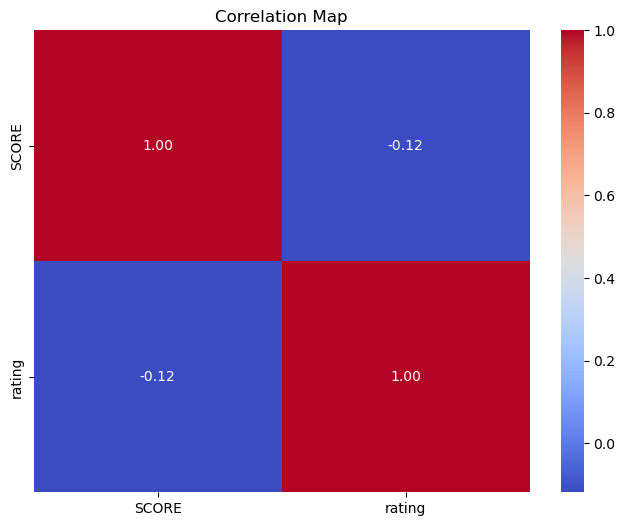

In [28]:
numeric_columns = ['SCORE', 'rating']

mdf_numeric = merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

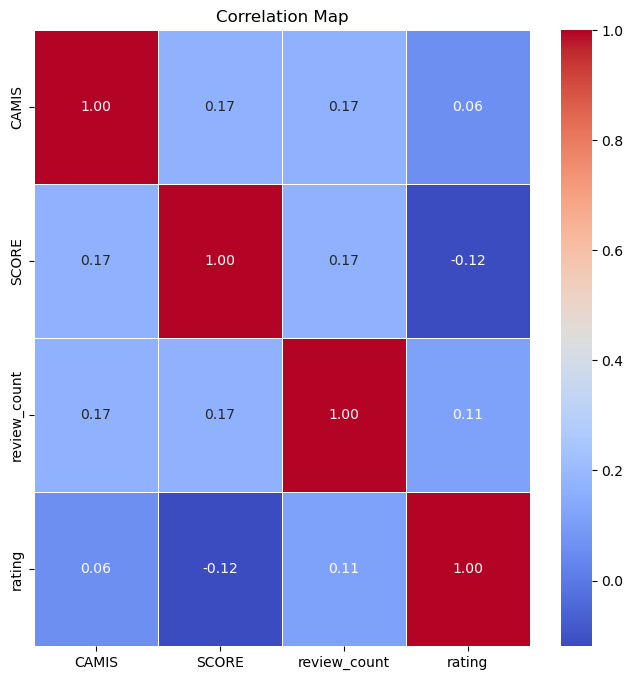

In [29]:
# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

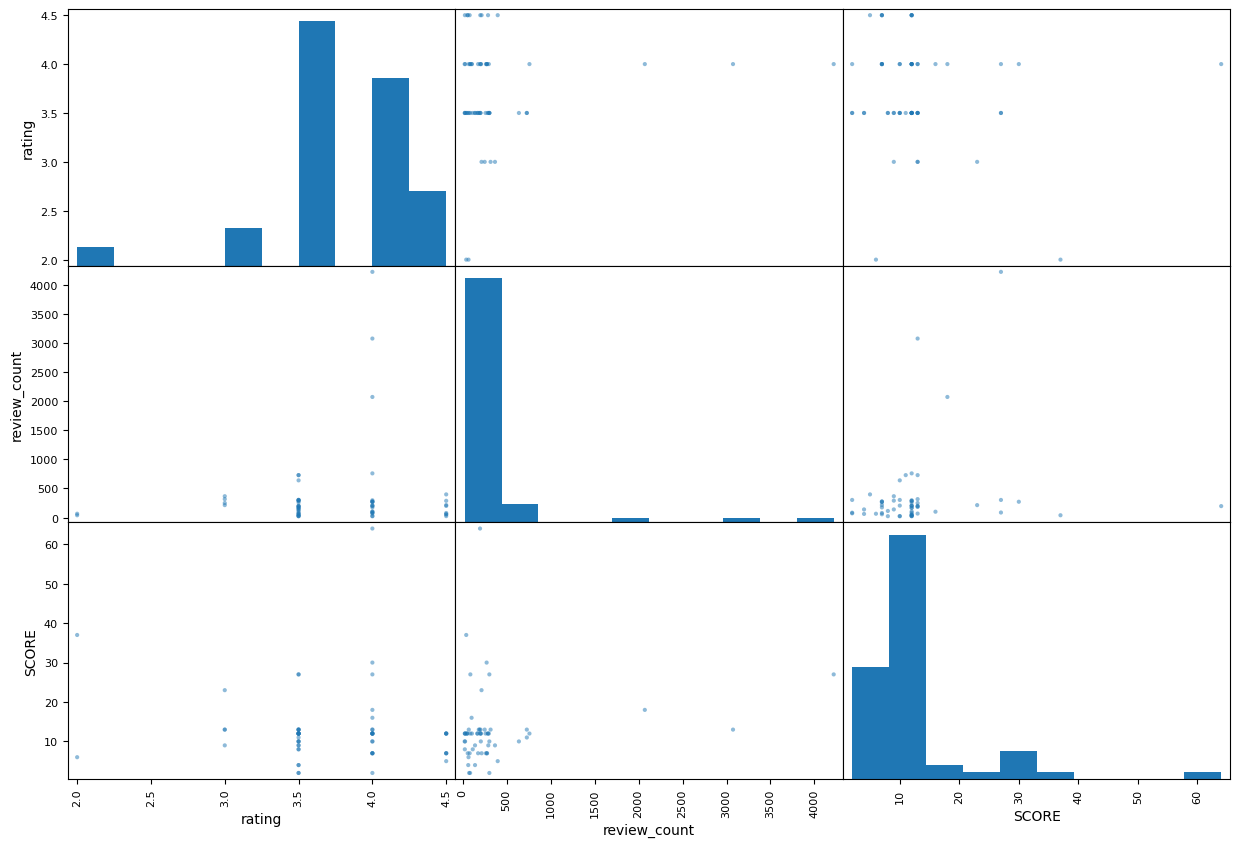

In [30]:
#creates a scatter plot matrix for recent_df
pd.plotting.scatter_matrix(merged_df[['rating','review_count', 'SCORE']], 
                           figsize=(15, 10));

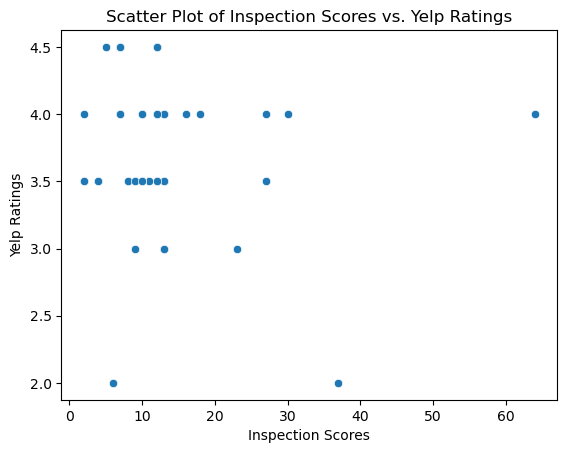

In [31]:
# Visualizing the correlation between Inspection scores and Yelp Ratings
sns.scatterplot(x=merged_df['SCORE'], y=merged_df['rating'])
plt.title('Scatter Plot of Inspection Scores vs. Yelp Ratings')
plt.xlabel('Inspection Scores')
plt.ylabel('Yelp Ratings')
plt.show()

## **Hypothesis Test 2:Try to find correlation between the inspection grades and the ratings on Yelp data**

## **Consider instead trying to find correlation between amount of reviews and ratings on Yelp data**

In [32]:
# Remove rows with 'N', 'Z', and 'P' in the 'GRADE' column
# These letters signify: N = Not Yet Graded, Z = Grade Pending,
# P= Grade Pending issued on re-opening following an initial inspection that resulted in a closure
#merged_df = merged_df[~merged_df['GRADE'].isin(['N', 'Z', 'P'])]

In [33]:
merged_df['rating'].value_counts()

3.5    26
4.0    20
4.5     8
3.0     4
2.0     2
Name: rating, dtype: int64

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 171 to 318
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  60 non-null     int64  
 1   DBA                    60 non-null     object 
 2   BORO                   60 non-null     object 
 3   STREET                 60 non-null     object 
 4   CUISINE DESCRIPTION    60 non-null     object 
 5   INSPECTION DATE        60 non-null     object 
 6   ACTION                 60 non-null     object 
 7   VIOLATION CODE         60 non-null     object 
 8   VIOLATION DESCRIPTION  60 non-null     object 
 9   SCORE                  60 non-null     float64
 10  GRADE DATE             60 non-null     object 
 11  INSPECTION TYPE        60 non-null     object 
 12  name                   60 non-null     object 
 13  image_url              60 non-null     object 
 14  review_count           60 non-null     int64  
 15  ratin

In [35]:
print("Number of non-null values in 'rating':", merged_df['rating'].count())

Number of non-null values in 'rating': 60


In [36]:
# review_count_counts = merged_df['review_count'].value_counts().sort_values(ascending=False)
print(merged_df['review_count'])

171    2071
478     140
77      303
438      40
515     398
85      729
488      79
83      729
323     192
331     167
67      202
458     275
32       25
260     175
74      303
463      57
266     639
154    3074
491      86
58      208
482     140
255     105
357     214
450     114
213      84
225      24
44      288
6       264
461     291
455     260
60      284
494      27
353     215
500      87
120    4219
92       43
375      54
144     759
134     317
336     167
51       73
467     277
73      202
9       297
2       250
14      367
417     197
250     272
41       49
343     206
514      69
449      63
80      303
452      28
487     200
475     183
233      24
296      22
361      66
318     101
Name: review_count, dtype: int64


In [37]:
review_count = merged_df['review_count']
rating = merged_df['rating']

# Calculate IQR
Q1 = review_count.quantile(0.25)
Q3 = review_count.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (review_count < Q1 - 1.5 * IQR) | (review_count > Q3 + 1.5 * IQR)

# Print outliers
print("Outliers:")
print(merged_df[outliers])

Outliers:
        CAMIS                        DBA      BORO            STREET  \
171  50084972                JOE'S PIZZA  Brooklyn          5 AVENUE   
85   50056825                 BEST PIZZA  Brooklyn          AVENUE O   
83   41411423                 BEST PIZZA  Brooklyn  HAVEMEYER STREET   
266  41393052                  IGNAZIO'S  Brooklyn      WATER STREET   
154  50037645                JOE'S PIZZA  Brooklyn    BEDFORD AVENUE   
120  50057010  ARTICHOKE BASILLE'S PIZZA  Brooklyn          4 AVENUE   
144  41250435          VINNIE'S PIZZERIA  Brooklyn    BEDFORD AVENUE   

    CUISINE DESCRIPTION INSPECTION DATE  \
171               Pizza      01/03/2023   
85                Pizza      02/28/2022   
83                Pizza      03/16/2023   
266               Pizza      05/08/2023   
154               Pizza      05/08/2023   
120               Pizza      09/06/2023   
144               Pizza      09/25/2019   

                                              ACTION VIOLATION CODE 

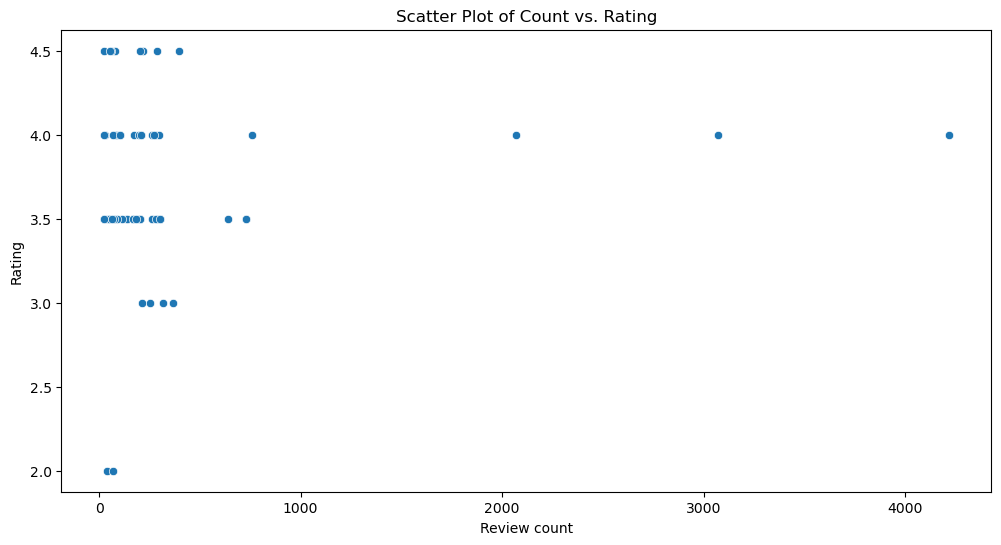

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_count', y='rating', data=merged_df)
plt.title('Scatter Plot of Count vs. Rating')
plt.xlabel('Review count')
plt.ylabel('Rating')
plt.show()

In [39]:
# Drop rows with NaN values if needed
original_length = len(merged_df)
merged_df = merged_df.dropna(subset=['review_count', 'rating'])
new_length = len(merged_df)

print(f'Original length: {original_length}')
print(f'New length after dropping NaN values: {new_length}')


# Convert 'rating' column to numeric
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')

# Replace infinite values with NaN and drop rows with NaN values in the 'rating' column
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(subset=['rating'], inplace=True)

# Perform Pearson correlation test
if len(merged_df['review_count']) < 2 or len(merged_df['rating']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['review_count'], merged_df['rating'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Original length: 60
New length after dropping NaN values: 60
Correlation: 0.11
P-value: 0.3842
There is no significant correlation.


## **Feature Engineering**

- Find out if there is a significant correlation between certain violations for certain restaurant types of specific areas/boros.

- Most common violations for each restaurant type and each set of chains if applicable for each boro.

- Do corporate restaurants or privately owned places get better scores/grades? What are the most common violations that cost the most points on the inspections.

- Construct predictive models to predict when initial and re-inspections are going to happen

- Construct predictive models to predict which restaurants will pass/fail inspections.

- Find out if there is correlation between a higher score/grade causing a restaurant to recive an overall better score on yelp. Look at the comparison between the results for coporate and privately owned places.